## <span style="color:green">  ESERCITAZIONE 3</span>

<img src="Arance.png" width="800">

### <span style="color:blue">  Esercizio 03.1</span>
<span style="color:blue">  Calcola con metodo Monte Carlo, al tempo $t=0$, dati i parametri nel testo dell'esercizio, il valore dell'opzione Europea Call, C e dell'opzione Europea Put, P.</span>

Un derivato è un prodotto finanziario il cui valore deriva dal prezzo di un bene sottostante. Dal punto di vista matematico, se consideriamo che questo prezzo possa variare nel tempo, allora il bene sottostante può essere visto come una funzione del tempo $S(t)$. I derivati si possono acquistare o vendere tramite un contratto stipulato tra due persone: uno vende il prodotto e l'altro lo compra. I motivi che spingono alcune persone a sottoscrivere questo tipo di contratto sono: 

1. per chi **compra**: comprare quel bene ad un prezzo accessibile, prima che nel mercato si verifichi un'eventuale sfavorevole variazione del prezzo;
2. per chi **vende**: assicurarsi subito un cliente e non sprecare la merce.

Un esempio di derivato è l'opzione, un contratto in cui solo uno dei due partner in affari assume un obbligo, mentre l'altro ottiene un diritto. Il più semplice tipo di opzione è l'**opzione Europea**, un contratto che funziona così: 
1. il venditore dell'opzione  garantisce all'acquirente, al tempo $t=T$, 
2. il diritto di **comprare** da lui, opzione **Call**, o di **vendere** a lui, opzione **Put**, il bene sottostante, 
3. ad un prezzo $K$ stabilito al tempo $t=0$, momento in cui viene stipulato il contratto, 
4. anziché al prezzo $S(T)$, che è il prezzo che avrà il bene al tempo $T$ il seguito alle variazioni dovute al mercato. 

Il punto fondamentale dell'opzione Europea è che soltanto chi vende l'opzione ha l'obbligo, invece chi compra può decidere se esercitare o meno questo diritto. Lo farà secondo questa logica:
1. concordo con il partner in affari al tempo $t=0$, di acquistare il bene al tempo $t=T$, al prezzo $K$ anziché $S(T)$,
2. aspetto fino al tempo $t=T$, dopodiché confronto il prezzo finale $S(T)$ con $K$:
3. se $S(T)>K$, ossia se il prezzo del bene sul mercato è *aumentato*, compro questo bene dal partner al prezzo $K$,
4. se $S(T)<K$, ossia se il prezzo del bene sul mercato è *diminuito*, compro questo bene sul mercato al prezzo $S(T)$. 
5. Il mio obiettivo è quello di spendere di meno per quel bene e non ho l'obbligo di comprare dal partner. 
6. Il vantaggio del partner è che lui, vendendo ad un prezzo inferiore, si assicura di avere un cliente e che quindi la sua merce non venga sprecata.

Un esempio di prodotto che potrei acquistare in anticipo sono le arance. Stipulo con il venditore il contratto dell'opzione al tempo $t=0$, in estate, quando le arance sono ancora verdi. Il tempo finale $t=T$ corrisponde al tempo in cui le arance sono arancioni e in vendita al supermercato: in inverno. A questo punto confronto il prezzo esposto con il prezzo del contratto e decido se acquistarle al supermercato o dal venditore. Sceglierò chi mi fa risparmiare.

Il guadagno per l'opzione Europea Call è: $max[0,S(T)-K]$, ossia: se compro sul mercato non ci guadagno nulla, mentre se compro dal partner ad un prezzo inferiore ci guadagno la differenza tra il prezzo di mercato e il prezzo a cui io compro. Il guadagno per l'opzione Europea Put è $max[0,K-S(T)]$, ossia: se non vendo non ci guadagno nulla, mentre se vendo ci guadagno la differenza tra prezzo a cui vendo e prezzo a cui ho acquistato il bene sul mercato. 

La teoria di Black e Scholes assume che l'evoluzione temporale di un bene sottostante sia stocastica e mostra il comportamento di un *Moto Browniano Geometrico GMB*, con tasso di interesse $r$ e volatilità $\sigma$. 

<span style="color:blue"> 1. Risolvi l'esercizio campionando direttamente il prezzo del bene sottostante $S(T)$, per un $GMB(r,\sigma^{2})$.  </span> 

Dato un prezzo iniziale $S(0)$, questo evolverà come un moto Browniano geometrico descritto dalla relazione:
\begin{equation}
 S(t) = S(0) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)t+\sigma Z\sqrt{t}\right], \quad \quad Z \sim \mathcal{N}(0,1).
\end{equation}

$Z$ è un numero estratto con distribuzione normale, Gaussiana con media $0$ e varianza $1$. Calcolato il prezzo dell'opzione al tempo $T$, calcolo il guadagno, sia per l'opzione Call sia per la Put:
\begin{equation}
   G_{C} = max[0,S(T)-K], \quad \quad G_{P} = max[0,K-S(T)].
\end{equation}

Per ottenere il valore presente, al tempo $t$, dobbiamo effettuare sull'importo uno **sconto** $\exp(-rt)$, che sarebbe l'interesse dato dalla banca sulla somma depositata. I guadagni finali che vogliamo calcolare sono, rispettivamente per l'opzione Call e l'opzione Put:
\begin{equation}
   C[S(0),0]=G_{C}\exp(-rT), \quad \quad P[S(0),0]=G_{P}\exp(-rT).
\end{equation}

Vorremmo conoscere i valori a cui tendono i guadagni finali: usiamo il metodo della media a blocchi. Generiamo $N=100$ blocchi di $L=1000$ guadagni ciascuno. Il codice avrà generato in tutto $M=10^{5}$ guadagni. Fa la simulazione prima per l'opzione Call, poi per l'opzione Put. 

In questo esercizio calcoliamo via Monte Carlo il valore dell'opzione Europea perché è l'unica della quale si lo si può calcolare anche in maniera analitica ed è quindi possibile fare un confronto tra i due risultati. Nel testo dell'esercizio viene fornito uno specchietto che risolve in maniera analitica le equazioni di Black e Scholes per l'opzione Europea, in entrambi i casi. I valori a cui convergono i guadagni con la media a blocchi devono coincidere con le soluzioni analitiche.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

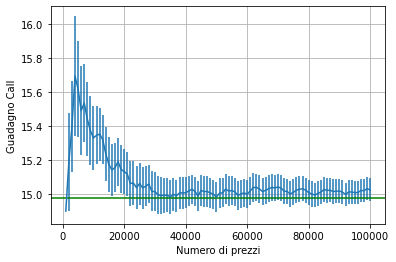

In [3]:
x, f, error = np.loadtxt("guadagno_call.dat", usecols=(0,1,2), delimiter='  ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.axhline(y=14.97579, color='green')
plt.xlabel('Numero di prezzi')
plt.ylabel('Guadagno Call')
plt.grid(True)
plt.show()

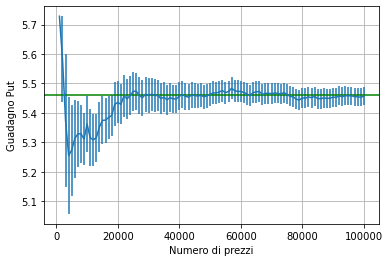

In [7]:
x, f, error = np.loadtxt("guadagno_put.dat", usecols=(0,1,2), delimiter='  ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.axhline(y=5.45953, color='green')
plt.xlabel('Numero di prezzi')
plt.ylabel('Guadagno Put')
plt.grid(True)
plt.show()

Nei due grafici è riportato il risultato con la media a blocchi per i guadagni delle opzioni Call e Put campionando direttamente il prezzo al tempo finale $T$. La linea verde corrisponde al risultato che si ottiene risolvendo analiticamente le equazioni di Black e Scholes per i due casi. Osserviamo che le barre di errore, con l'aumentare della convergenza, intersecano sempre la linea del valore teorico ideale e che i valori medi sono molto vicini a tale linea.

<span style="color:blue"> 2. Risolvi l'esercizio campionando il $GMB(r,\sigma^{2})$ discretizzato relativo al prezzo, dividendo $[0,T]$ in $100$ intervalli. </span> 

In questo caso, il modo di procedere è lo stesso dell'esercizio precedente, cambia solo il modo di calcolare $S(T)$. Prima abbiamo calcolato $S$ una volta sola, per il tempo $T$. Adesso calcolamo $S$ al tempo $t$ per $100$ volte, una volta per ogni intervallino i-esimo, usando la formula: 
\begin{equation}
   S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right].
\end{equation}

Estraiamo $Z_i \sim \mathcal{N}(0,1)$ in ciascun intervallino i-esimo, calcoliamo $S(t_{i+1})$, sommiamo tutti questi valori e troviamo $S(T)$. Dopodiché si procede come indicato nell'esercizio precedente. I grafici successivi rappresentano come si assesta il guadagno per l'opzione Call e per l'opzione Put, essendo $S(t_{i+1})$ campionato in ogni intervallino i-esimo e lo confrontiamo con il valore di aspettazione teorico dato dalla soluzione delle equazioni di Black e Scholes.

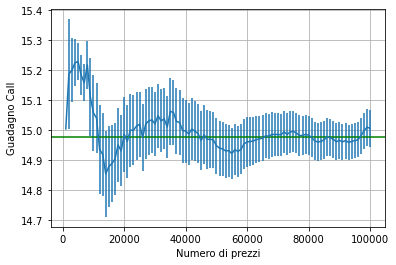

In [2]:
x, f, error = np.loadtxt("intervalli_call.dat", usecols=(0,1,2), delimiter='  ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.axhline(y=14.97579, color='green')
plt.xlabel('Numero di prezzi')
plt.ylabel('Guadagno Call')
plt.grid(True)
plt.show()

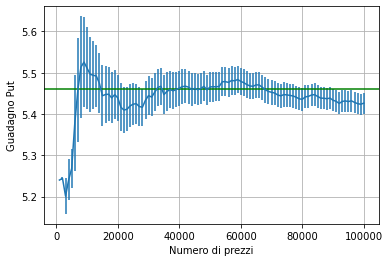

In [3]:
x, f, error = np.loadtxt("intervalli_put.dat", usecols=(0,1,2), delimiter='  ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.axhline(y=5.45953, color='green')
plt.xlabel('Numero di prezzi')
plt.ylabel('Guadagno Put')
plt.grid(True)
plt.show()

In entrambi i casi, il valore teorico è compreso nelle barre di errore. Rispetto al caso precedente, le barre di errore hanno circa la stessa lunghezza ma i prezzi calcolati hanno massimi e minimi compresi in un intervallo più piccolo: sono in media più vicini alla linea del valore teorico.